In [1]:
# PCA 실습
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[95, 90, 80, 70, 40, 80, 95, 30, 15, 60],
        [95, 95, 75, 60, 35, 80, 90, 25, 10, 70]]

data_np = np.array(data)
data_np = data_np.T

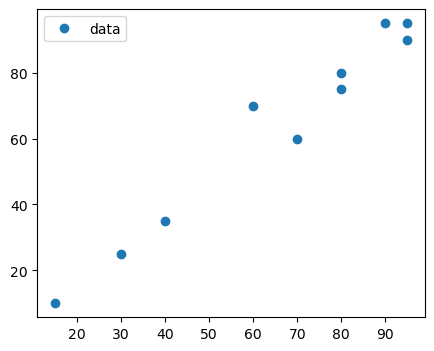

In [2]:
plt.figure(figsize = (5, 4))
plt.plot(data_np[:, 0], data_np[:, 1], 'o', label = 'data')
plt.legend()
plt.show()

평균 : [65.5 63.5], 분산 : [727.25 830.25], 표준편차 : [26.96757312 28.81405907]
정규화된 데이터 : 
[[ 1.1  1.1]
 [ 0.9  1.1]
 [ 0.5  0.4]
 [ 0.2 -0.1]
 [-0.9 -1. ]
 [ 0.5  0.6]
 [ 1.1  0.9]
 [-1.3 -1.3]
 [-1.9 -1.9]
 [-0.2  0.2]]


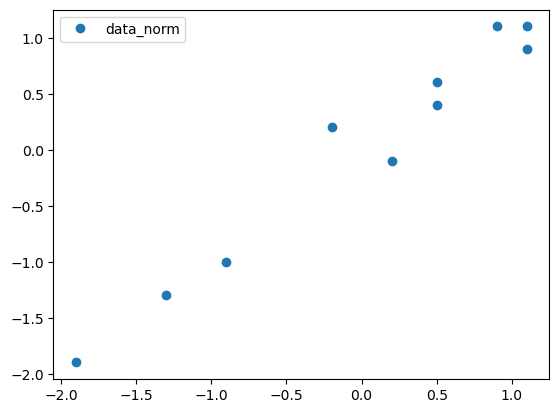

In [9]:
# 표준화
data_mean = np.mean(data_np, axis = 0)
data_std = np.std(data_np, axis = 0)
data_var = np.var(data_np, axis = 0)
data_norm = (data_np - data_mean) / data_std
data_norm_1 = np.round(data_norm, 1)

print(f"평균 : {data_mean}, 분산 : {data_var}, 표준편차 : {data_std}")
print(f"정규화된 데이터 : \n{data_norm_1}")

plt.plot(data_norm_1[:, 0], data_norm_1[:, 1], 'o', label = 'data_norm')
plt.legend()
plt.show()

In [10]:
# 공분산 행렬 구하기
d_cov = np.cov(data_norm_1.T)
d_cov = d_cov / d_cov.max()
d_cov = np.round(d_cov, 2)
d_cov

array([[0.98, 0.97],
       [0.97, 1.  ]])

In [6]:
# 고유값, 고유벡터 구하기
eigvalues, eigvectors = np.linalg.eig(d_cov)
eigvectors = eigvectors / eigvectors.max()

print(f"eigvalues : {eigvalues}")
print(f"ratio : {eigvalues / np.sum(eigvalues)}")
print(f"eigvectors : \n{eigvectors}")

eigvalues : [1.98 0.02]
ratio : [0.99 0.01]
eigvectors : 
[[ 1. -1.]
 [ 1.  1.]]


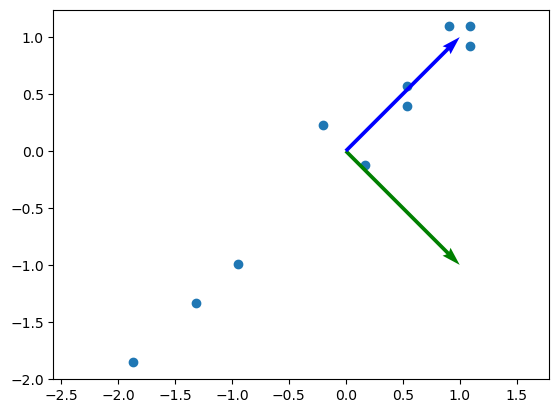

In [7]:
plt.scatter(data_norm[:, 0], data_norm[:, 1])
plt.quiver((0, 0), (0, 0), eigvectors[:, 0], eigvectors[:, 1], color = ['g', 'b'], units = 'xy', scale = 1)
plt.axis('equal')
plt.show()

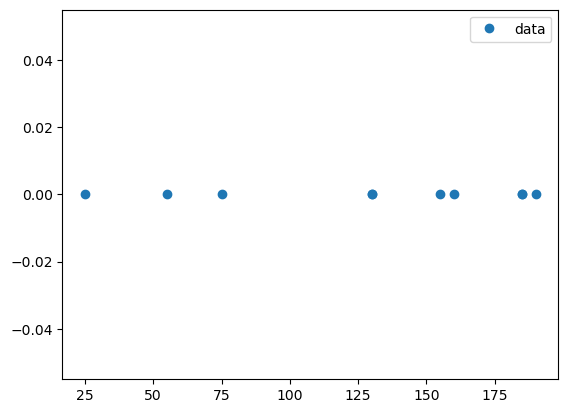

In [ ]:
# 첫 번째 PC 선택
F = eigvectors[:, 0]

# 내적 계산
data_new = np.dot(data_norm_1, F)

# 시각화
plt.plot(data_new, np.zeros(10), 'o', label = 'data')
plt.legend()
plt.show()

In [11]:
data_new

array([ 2.2,  2. ,  0.9,  0.1, -1.9,  1.1,  2. , -2.6, -3.8,  0. ])

In [21]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 1)
res = pca_model.fit_transform(data_norm)
print(res)

[[ 1.54652929]
 [ 1.41542614]
 [ 0.66241305]
 [ 0.03210165]
 [-1.36802575]
 [ 0.78511474]
 [ 1.4238276 ]
 [-1.87563545]
 [-2.63705   ]
 [ 0.01529873]]
